In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

Importing the file for further Operations

In [3]:
df = pd.read_csv("Churn_Modelling.csv", encoding = 'unicode_escape')

Data Cleaning Process

In [7]:
#Now df is my DATAFRAME NOW I'LL WORK IN IT
df.shape

(10000, 14)

In [ ]:
df.head(8)

In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

In [4]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [ ]:
df.info()

Getting data into arrays for checking the uniques values, data types and null values

In [68]:
def Getdata_info(data):
    cols = []
    unique_val = []
    n_uniques = []
    dtypes = []
    nulls = []
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        n_uniques.append(data[col].nunique())
        unique_val.append(data[col].unique())
        nulls.append(data[col].isna().sum())

    return pd.DataFrame({"Col": cols,"dtype":dtypes,"n_uniques":n_uniques,"Unique Values":unique_val,"Nulls":nulls})

In [69]:
Getdata_info(df)

,Col,dtype,n_uniques,Unique Values,Nulls
0,CreditScore,int64,460,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",0
1,Geography,object,3,"[France, Spain, Germany]",0
2,Gender,object,2,"[Female, Male]",0
3,Age,int64,70,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",0
4,Tenure,int64,11,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]",0
5,Balance,float64,6382,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",0
6,NumOfProducts,int64,4,"[1, 3, 2, 4]",0
7,HasCrCard,int64,2,"[1, 0]",0
8,IsActiveMember,int64,2,"[1, 0]",0
9,EstimatedSalary,float64,9999,"[101348.88, 112542.58, 113931.57, 93826.63, 79...",0


In [27]:
pd.isnull(df)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [29]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Data Visualization

In [6]:
NumberCols = df.select_dtypes(exclude='O').columns.tolist()
print(NumberCols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


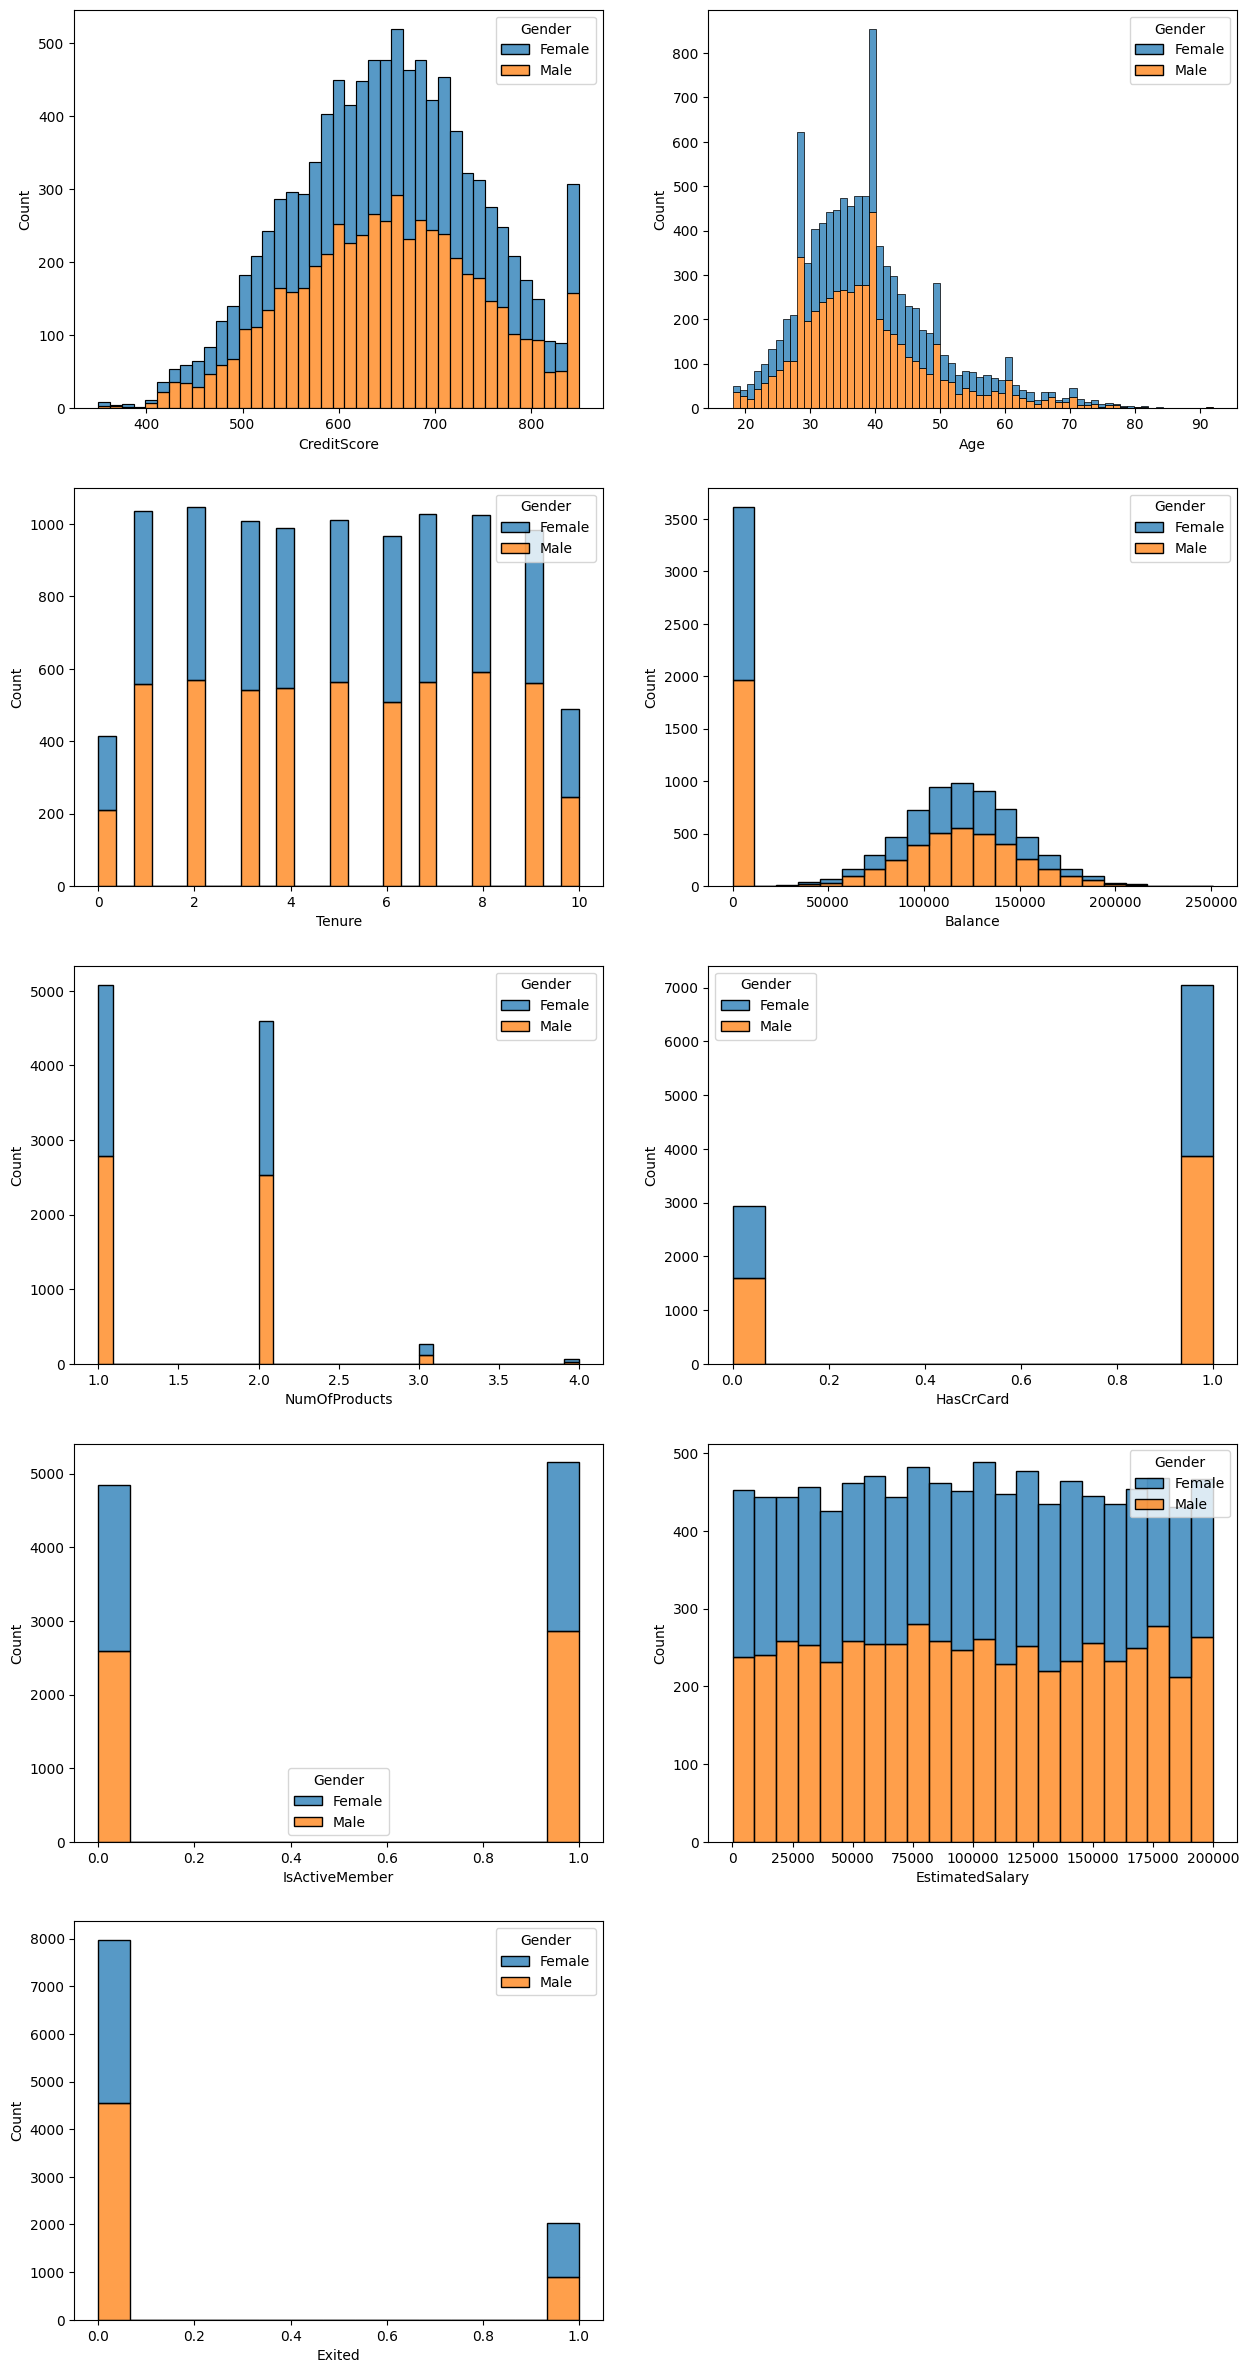

In [23]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(NumberCols, 1):
    plt.subplot((len(NumberCols)//2+1), 2, i)
    sns.histplot(data=df, x=column, hue='Gender', multiple='stack')

THIS VISUALIZATION SHOWS THAT THE FEMALES ARE DOMINANT IN EVERY ASPECT EITHER IT IS CREDIT SCORE, AGE, TENURE, BALANCE IN ACCOUNT, SALARY AND ACTIVE MEMBER


In [25]:
Non_Num = df.select_dtypes(include='O').columns.tolist()
Non_Num

['Geography', 'Gender']

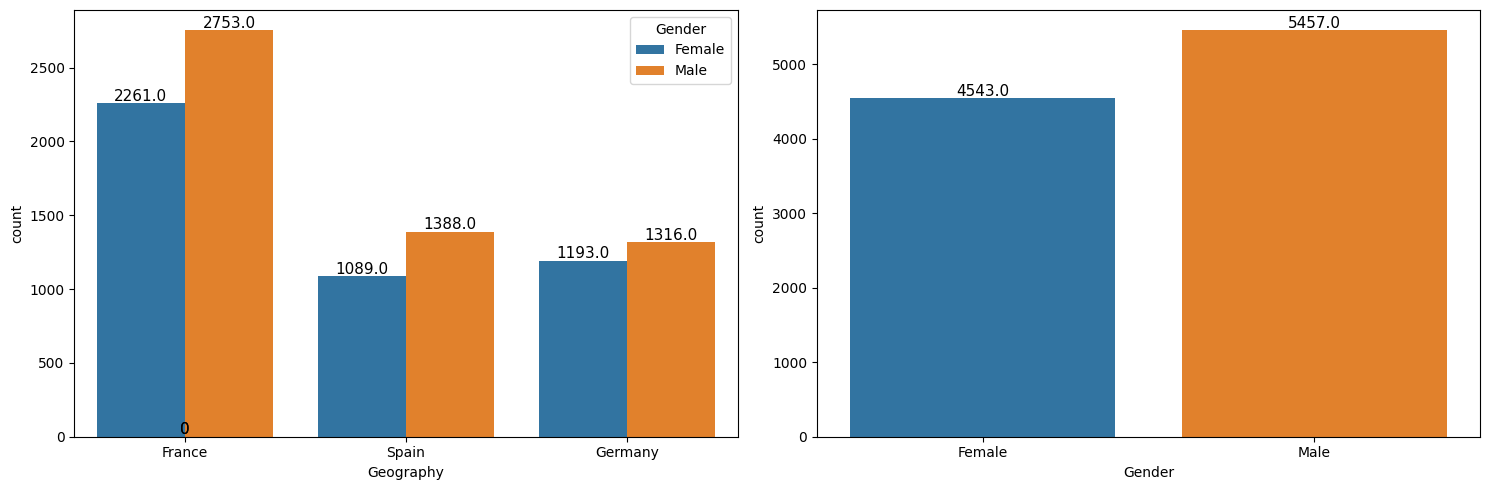

In [57]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(Non_Num, 1):
    plt.subplot(1, 2, i)
    ax = sns.countplot(data=df, x=column, hue='Gender')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='BLACK', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()
plt.show()


From this visualization of Geography shows that most of the customers are from france and mainly they are females


<Axes: xlabel='Age', ylabel='Count'>

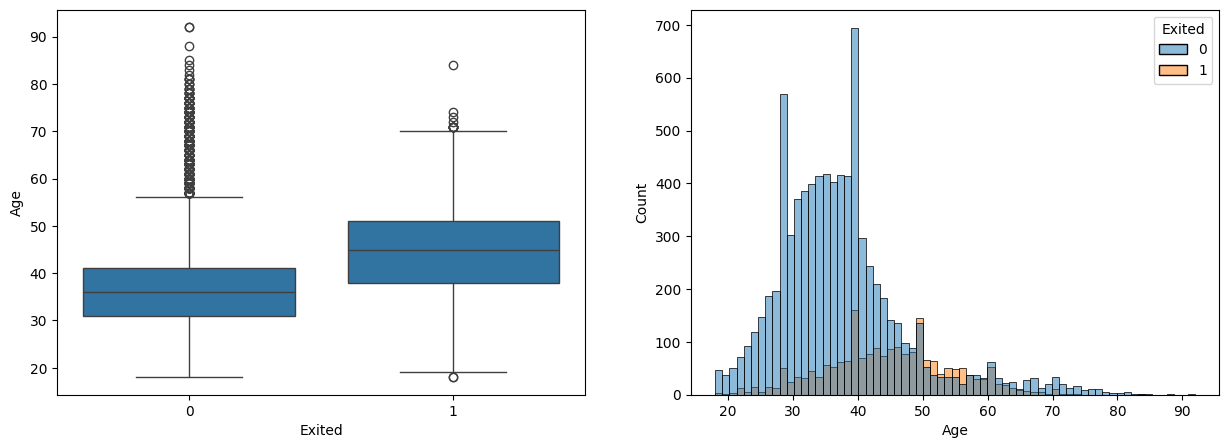

In [55]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x="Exited", y="Age", data=df, ax=ax[0])
sns.histplot(df, x="Age", hue="Exited", ax=ax[1])

The customer's highest ages that are excited are 84 they shows enthusiasm and positive engagement with the product and services.

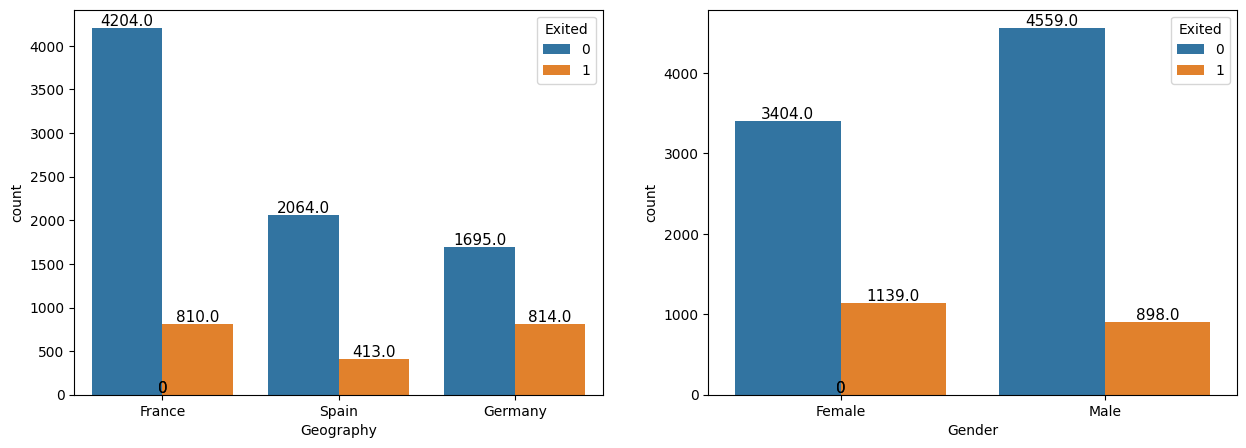

In [62]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(Non_Num, 1):
    plt.subplot(1, 2, i)
    ax = sns.countplot(data=df, x=col, hue='Exited')
    # for adding labels on the stack bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='BLACK', xytext=(0, 5),
                    textcoords='offset points')

The highest ratio or people that are less likely to churn and who are excited lives in Germany and most of them are females.

C:\Users\Hp\AppData\Local\Temp\ipykernel_20852\4116194889.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues')


<Axes: >

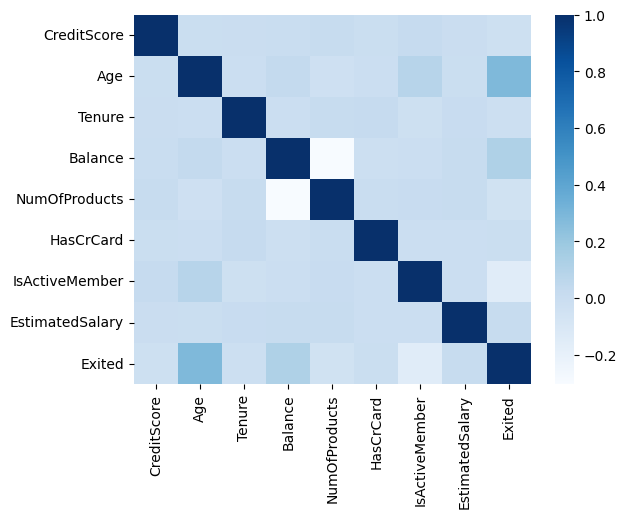

In [67]:
sns.heatmap(df.corr(), cmap='Blues')


The heatmap reveals several key insights about factors influencing customer churn. Notably, older customers and those with higher account balances are more likely to churn, as indicated by moderate positive correlations between these features and the Exited variable. In contrast, active members and customers with multiple products are less likely to churn, demonstrated by negative correlations with Exited. Features such as CreditScore, Tenure, HasCrCard, and EstimatedSalary show minimal correlation with churn, suggesting they are not strong predictors. These insights can guide targeted retention efforts, emphasizing the importance of engagement programs to maintain active membership and encouraging the use of multiple products to reduce churn rates.

Thankyou !